# investigating Data

## Authors
* **Alireza Arbabi**
* **Hadi Babalou**
* **Ali Padyav**

## Table of Contents

- [Setting Up the Environment](#setting-up-the-environment)
- [Sunken Ship Passengers](#sunken-ship-passengers)
- [Data Scientist Salaries](#data-scientist-salaries)

## Setting Up the Environment

In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install tqdm
!pip install scipy

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import tqdm
import random
import math


import warnings
warnings.filterwarnings("ignore")

## Sunken Ship Passengers

The `passengers dataset` contains information about the passengers of the sunken ship **RMS Lusitania**. In this task, we will become familiar with working with numpy, pandas, and matplotlib.

This is a brief explanation of the columns in the given dataset:
* **survived** - 1 if the passenger survived, 0 otherwise
* **pclass** - Passenger class (1, 2, or 3)
* **sex** - The passenger's sex (male or female)
* **age** - The passenger's age in years
* **sibsp** - The number of siblings or spouses the passenger had aboard the ship
* **parch** - The number of parents or children the passenger had aboard the ship
* **fare** - The fare the passenger paid for their ticket
* **embarked** - The passenger's port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* **class** - The class of the ticket (First, Second, or Third)
* **who** - Categories of passengers (man, woman, or child)
* **adult_male** - A boolean indicating if the passenger is an adult male or not.
* **deck** - The deck the passenger's cabin was on, indicated by the first letter of the cabin's name
* **embark_town** - The port of embarkation
* **alive** - A boolean indicating if the passenger survived or not
* **alone** - A boolean indicating if the passenger was alone or not

#### Firing up the essential libraries

In [41]:
df1 = pd.read_csv("passengers_dataset.csv")

Q1: Let's getting familiar with our dataset by using the .info() command. This command shows the number of Non-Null objects for each column, as well as their data types.

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


By using the .describe() command, we can gain statistical insights about the dataset. 

In [43]:
df1.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The head() and tail() commands also show the top 10 and latest 10 rows of the dataset.

In [44]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
df1.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


#### Q2: Labeling on categorical data

In [46]:
df1.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

Let's analyze each categorical column to decide about the encoding method wisely:

In [47]:
categorical_columns = df1.select_dtypes(include=['object', 'category', 'bool'])

for column in categorical_columns.columns:
    print(f"Value counts for column '{column}':")
    print(df1[column].value_counts())
    print()

Value counts for column 'sex':
male      577
female    314
Name: sex, dtype: int64

Value counts for column 'embarked':
S    644
C    168
Q     77
Name: embarked, dtype: int64

Value counts for column 'class':
Third     491
First     216
Second    184
Name: class, dtype: int64

Value counts for column 'who':
man      537
woman    271
child     83
Name: who, dtype: int64

Value counts for column 'adult_male':
True     537
False    354
Name: adult_male, dtype: int64

Value counts for column 'deck':
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

Value counts for column 'embark_town':
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

Value counts for column 'alive':
no     549
yes    342
Name: alive, dtype: int64

Value counts for column 'alone':
True     537
False    354
Name: alone, dtype: int64



For performing the encoding we have 2 main solutions which works well here:

1. Label-Encoding: Label encoding is a technique used to convert categorical variables into numerical format by assigning a unique integer to each category, preserving ordinality if present.

2. On-Hot Encoding: One-hot encoding is a method to represent categorical variables as binary vectors, where each category is represented by a binary value (0 or 1) in a separate feature, indicating its presence or absence.

In general, Label-Encoding is used when the values have ordinal relation with each other, while one-hot encoding should be used when the values do not have ordinal relation with each other.

Now based on the provided explanation, we perform the encoding for each columns as follows:

We do label encoding for all categorical columns except the 'deck' column, and we perform one-hot encoding for the 'deck' column to prevent it from being misintended on having relations between its values.  

In [48]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

df1_new = df1.copy()


column_mappings = {}
# Iterate through each column in the DataFrame
for column in categorical_columns.columns:
        if column != 'deck':
            df1_new[column] = label_encoder.fit_transform(df1_new[column])
            column_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        else:
            df1_new = pd.get_dummies(df1_new, columns = ['deck'])

Here is our column mappings documenation:

In [49]:
column_mappings

{'sex': {'female': 0, 'male': 1},
 'embarked': {'C': 0, 'Q': 1, 'S': 2, nan: 3},
 'class': {'First': 0, 'Second': 1, 'Third': 2},
 'who': {'child': 0, 'man': 1, 'woman': 2},
 'adult_male': {False: 0, True: 1},
 'embark_town': {'Cherbourg': 0, 'Queenstown': 1, 'Southampton': 2, nan: 3},
 'alive': {'no': 0, 'yes': 1},
 'alone': {False: 0, True: 1}}

output result:

In [50]:
df1_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,1,22.0,1,0,7.2500,2,2,1,...,2,0,0,0,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,...,0,1,0,0,0,1,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,...,2,1,1,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,2,0,2,...,2,1,0,0,0,1,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,...,2,0,1,0,0,0,0,0,0,0


#### Q3: Generating the correlation matrix heatmap

<AxesSubplot:title={'center':'Correlation Matrix'}>

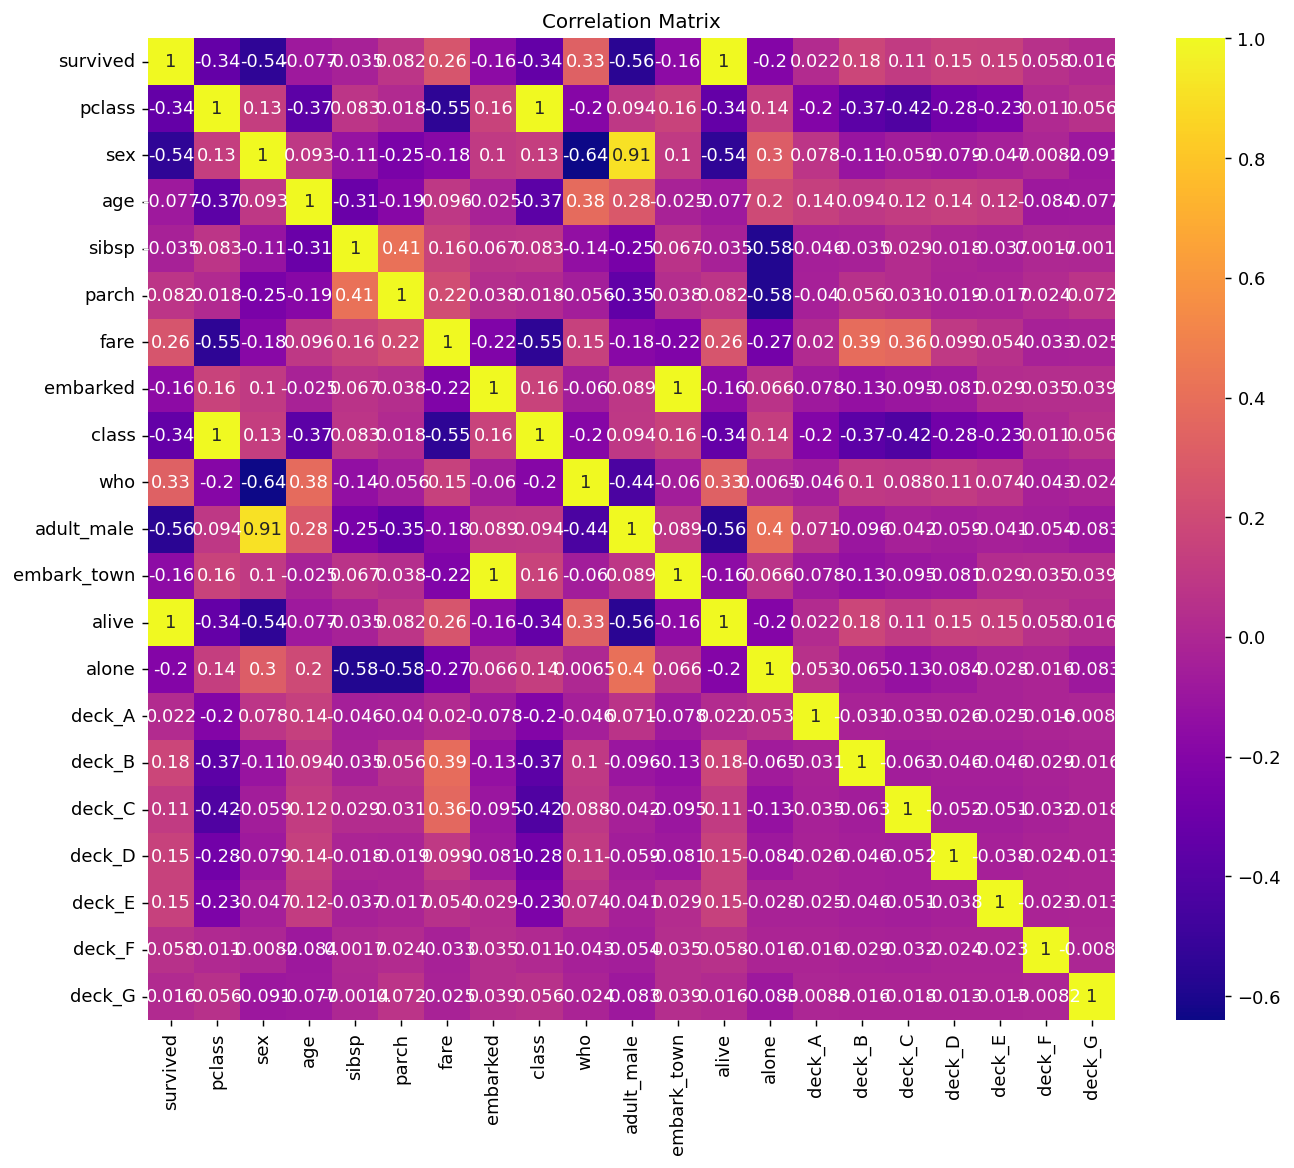

In [51]:
plt.figure (figsize = [12,10],  dpi = 130)
plt.title ("Correlation Matrix" , fontsize = 11)
correlation_matrix = df1_new.corr()
sns.heatmap (df1_new.corr(), annot = True , cmap="plasma")

#### Q4: Deleting extra columns

In [52]:
df1_new

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,1,22.0,1,0,7.2500,2,2,1,...,2,0,0,0,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,...,0,1,0,0,0,1,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,...,2,1,1,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,2,0,2,...,2,1,0,0,0,1,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,...,2,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,...,2,0,1,0,0,0,0,0,0,0
887,1,1,0,19.0,0,0,30.0000,2,0,2,...,2,1,1,0,1,0,0,0,0,0
888,0,3,0,NaN,1,2,23.4500,2,2,2,...,2,0,0,0,0,0,0,0,0,0
889,1,1,1,26.0,0,0,30.0000,0,0,1,...,0,1,1,0,0,1,0,0,0,0


In [53]:
correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] == 1:
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

            # df1_new.drop(df1_new.columns[j - dropped_columns_count], axis=1, inplace=True)
            # dropped_columns_count += 1
            
for pair in correlated_pairs:
    df1_new.drop(pair[1], axis=1, inplace=True)  # Drop the second column in each pair

In [54]:
df1_new

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,1,22.0,1,0,7.2500,2,1,1,0,0,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,2,0,0,0,0,1,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,0,1,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,2,2,0,0,0,0,1,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,2,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,1,0,0,0,0,0,0,0
887,1,1,0,19.0,0,0,30.0000,2,2,0,1,0,1,0,0,0,0,0
888,0,3,0,NaN,1,2,23.4500,2,2,0,0,0,0,0,0,0,0,0
889,1,1,1,26.0,0,0,30.0000,0,1,1,1,0,0,1,0,0,0,0


#### Q5: Number of survived passengers

In [55]:
df1_new[df1_new['survived'] == 1].shape[0]

342

#### Q6: all female passengers aged more than 30 years. 

In [56]:
df1_new[(df1_new['sex'] == 0) & (df1_new['age'] > 30)].shape[0]

103

In [57]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [58]:
df1_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,1,22.0,1,0,7.2500,2,1,1,0,0,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,2,0,0,0,0,1,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,0,1,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,2,2,0,0,0,0,1,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,2,1,1,1,0,0,0,0,0,0,0


#### Q7: Identify passengers who embarked from Cherbourg ('C') and paid a fare greater than $100.

In [59]:
df1_new[(df1_new['embarked'] == 0) & (df1_new['fare'] > 100)].shape[0]

29

#### Q8: Handeling missing values

missing values is one of the problem with most cleaned data, in order to solve this problem, we can use some of these technics:
1. delete entire column
2. replace the missing values with mean / median / mode / ....
3. replace the missing values by using multivariate approach, like KNN imputer

- The option 1 is good when a column has a lot of missing values, so in this case its better to delete the entire column, because we don't have enogh data to predict the appropriate value. 
- The option 2 is good when a column has enough values, that its mean/median is logical
- The option 3 is more complex, but more sometimes more accurate than others

In [60]:
df1.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [61]:
df1.isnull().sum() / len(df1)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

As we can see, most columns don't have much missing values, except the "deck" column which has 77% missing value rate. Therefore, we drop this column from our dataset.

In [62]:
df1.drop("deck", axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


for replacing the missing values of other columns, we use KNN imputer for doing it accurately.

In [63]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=7)
fitted_dataframe_array = impute_knn.fit_transform(df1_new)
df1_new = pd.DataFrame(fitted_dataframe_array, columns=df1_new.columns)

Let's see the result:

In [64]:
df1_new.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
who           0
adult_male    0
alone         0
deck_A        0
deck_B        0
deck_C        0
deck_D        0
deck_E        0
deck_F        0
deck_G        0
dtype: int64

#### Q9: What is the average age of passengers on the ship? How does it differ between males and females?

Overall average:

In [65]:
df1_new['age'].mean()

30.14006894340228

Male's average:

In [66]:
df1_new[df1_new['sex'] == 1]['age'].mean()

31.297397870760086

Female's average:

In [67]:
df1_new[df1_new['sex'] == 0]['age'].mean()

28.013384895359415

#### Q10: Is there a correlation between fare paid and survival rate? Provide a statistical summary.

Let's calculate the correlation first:

In [68]:
correlation = df1_new['fare'].corr(df1_new['survived'])

print("Correlation between feature1 and feature2:", correlation)

Correlation between feature1 and feature2: 0.2573065223849622


As we see, there is an approximate 0.26 correlation between these two features, which is not considered as a high correlcation. Let's create their scatter plot too: 

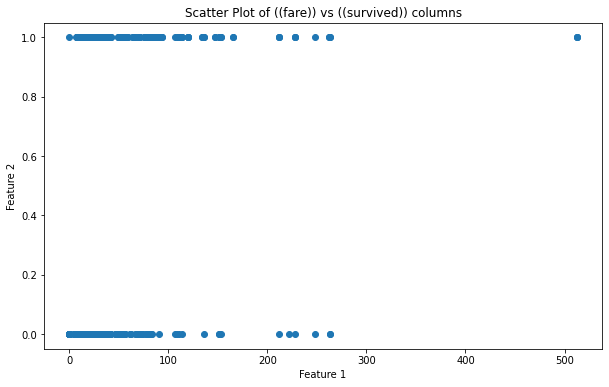

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(df1_new['fare'], df1_new['survived'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of ((fare)) vs ((survived)) columns')
plt.show()

#### Q11: Use Matplotlib to plot the proportion of passengers that survived by class.

In [70]:
df1_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


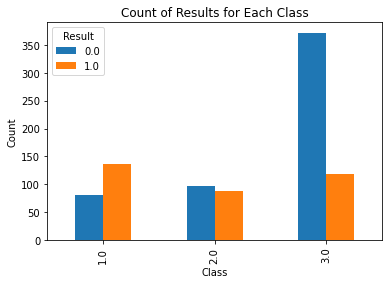

Mapping of classes: 1: First, 2: Second, 3: Third


In [71]:
result_counts = df1_new.groupby('pclass')['survived'].value_counts().unstack()

result_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Results for Each Class')
plt.legend(title='Result')
plt.show()

print("Mapping of classes: 1: First, 2: Second, 3: Third")

#### Q12: Plot the age distribution of passengers, distinguishing between those who survived and those who didn't.

Let's write a function to calculate the most applicable bin numbers in histograms for us by using the Freedman Diaconis formula:

In [72]:
def calculate_FreedManDiaconis_bin_num(target_column):
    # Calculate the Freedman-Diaconis bin width
    IQR = np.percentile(target_column, 75) - np.percentile(target_column, 25)
    bin_width = 2 * IQR / (len(target_column) ** (1/3))

    # Calculate the number of bins based on the Freedman-Diaconis rule
    num_bins = int(np.ceil((target_column.max() - target_column.min()) / bin_width))
    if num_bins < 50:
        return num_bins
    else:
        return 100

The age distribution of passengers:

Text(0.5, 1.0, 'Age distribution of all passengers')

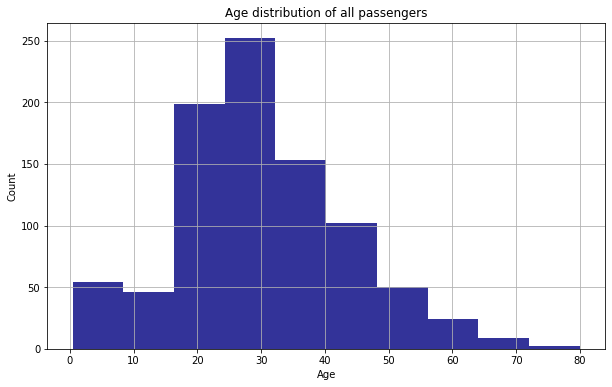

In [73]:
plt.figure(figsize=(10, 6))
df1_new['age'].hist(color = 'navy', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution of all passengers')

In [74]:
survived_passengers = df1_new[df1_new['survived'] == 1]
survived_ages = survived_passengers['age']
type(survived_ages)

pandas.core.series.Series

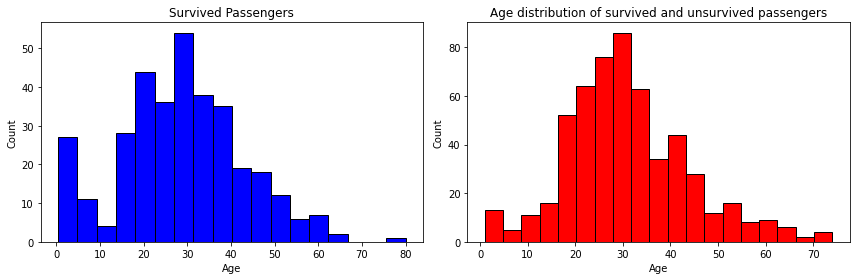

In [75]:
survived_passengers = df1_new[df1_new['survived'] == 1]
unsurvived_passengers = df1_new[df1_new['survived'] == 0]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].hist(survived_passengers['age'], bins=calculate_FreedManDiaconis_bin_num(survived_passengers['age']), color='blue', edgecolor='black')
axes[0].set_title('Survived Passengers')

axes[1].hist(unsurvived_passengers['age'], bins=calculate_FreedManDiaconis_bin_num(unsurvived_passengers['age']), color='red', edgecolor='black')
axes[1].set_title('Unsurvived Passengers')

for ax in axes:
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.title('Age distribution of survived and unsurvived passengers')
 
plt.show()

#### Q13: Create a scatter plot showing the relationship between age and fare paid, color-coded by survival.


Text(0.5, 1.0, 'Scatter plot of the ((age)) and ((fare)) features')

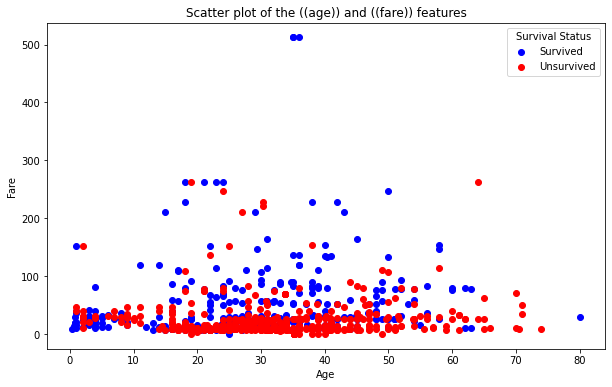

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(survived_passengers['age'], survived_passengers['fare'], color='blue')
plt.scatter(unsurvived_passengers['age'], unsurvived_passengers['fare'], color='red')

plt.legend(['Survived', 'Unsurvived'], title='Survival Status', loc='upper right')

plt.xlabel("Age")
plt.ylabel("Fare")
plt.title('Scatter plot of the ((age)) and ((fare)) features')

#### Q14: Create a pivot table to show the average fare and survival rate for each class and sex combination.

In [77]:
survival_stat = df1_new.groupby(['pclass','sex'])
print("Mapping of sex:", column_mappings['sex'])
survival_stat.mean()[['survived', 'fare']]

Mapping of sex: {'female': 0, 'male': 1}


survived        fare
pclass sex                      
1.0    0.0  0.968085  106.125798
       1.0  0.368852   67.226127
2.0    0.0  0.921053   21.970121
       1.0  0.157407   19.741782
3.0    0.0  0.500000   16.118810
       1.0  0.135447   12.661633

#### Q15: Plot a grouped bar chart using Matplotlib to show the average fare paid by passengers, grouped by their class and survival status.

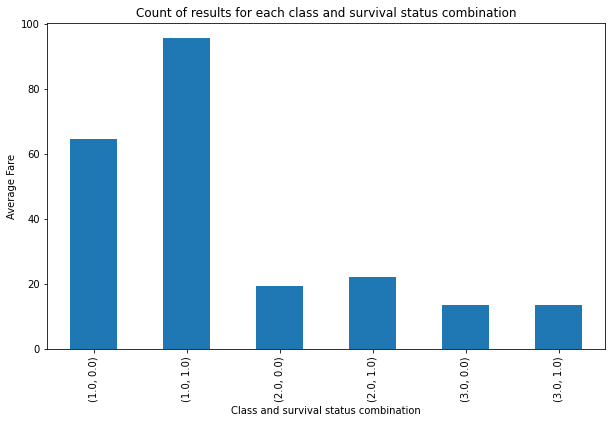

Each set of cobminations shows the (class num, survived, not survived)
Mapping of classes: 1: First, 2: Second, 3: Third


In [78]:
survival_stat = df1_new.groupby(['pclass','survived'])

plt.figure(figsize=(10, 6))
survival_stat.mean()['fare'].plot(kind='bar')
plt.xlabel('Class and survival status combination')
plt.ylabel('Average Fare')
plt.title('Count of results for each class and survival status combination')
plt.show()

print('Each set of cobminations shows the (class num, survived, not survived)')
print("Mapping of classes: 1: First, 2: Second, 3: Third")

## Data Scientist Salaries

In this section, we will work with the `salaries dataset` which contains information about the salaries of data scientists across different regions from 2020 to 2024.